# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('./data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [54]:
df.columns.values

array(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName',
       'MfgName', 'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g',
       'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg',
       'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg',
       'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg',
       'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg',
       'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA',
       'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA'], dtype=object)

In [3]:
df.shape

(8618, 45)

In [4]:
df.select_dtypes(exclude='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FoodGroup       8618 non-null   object
 1   ShortDescrip    8618 non-null   object
 2   Descrip         8618 non-null   object
 3   CommonName      1063 non-null   object
 4   MfgName         1560 non-null   object
 5   ScientificName  732 non-null    object
dtypes: object(6)
memory usage: 404.1+ KB


In [5]:
df.select_dtypes(exclude='number').nunique()

FoodGroup           25
ShortDescrip      8614
Descrip           8618
CommonName         443
MfgName             92
ScientificName     469
dtype: int64

In [6]:
df.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   Energy_kcal       8618 non-null   float64
 2   Protein_g         8618 non-null   float64
 3   Fat_g             8618 non-null   float64
 4   Carb_g            8618 non-null   float64
 5   Sugar_g           8618 non-null   float64
 6   Fiber_g           8618 non-null   float64
 7   VitA_mcg          8618 non-null   float64
 8   VitB6_mg          8618 non-null   float64
 9   VitB12_mcg        8618 non-null   float64
 10  VitC_mg           8618 non-null   float64
 11  VitE_mg           8618 non-null   float64
 12  Folate_mcg        8618 non-null   float64
 13  Niacin_mg         8618 non-null   float64
 14  Riboflavin_mg     8618 non-null   float64
 15  Thiamin_mg        8618 non-null   float64
 16  Calcium_mg        8618 non-null   float64


In [7]:
df.select_dtypes(include='number').mean(axis=0)

ID                  15467.757368
Energy_kcal           226.438617
Protein_g              11.523910
Fat_g                  10.647024
Carb_g                 21.819062
Sugar_g                 6.560253
Fiber_g                 2.023242
VitA_mcg               93.968786
VitB6_mg                0.264369
VitB12_mcg              1.225260
VitC_mg                 7.925377
VitE_mg                 0.872329
Folate_mcg             50.306104
Niacin_mg               3.411560
Riboflavin_mg           0.237248
Thiamin_mg              0.209857
Calcium_mg             73.411348
Copper_mcg              0.172181
Iron_mg                 2.696771
Magnesium_mg           32.745301
Manganese_mg            0.504439
Phosphorus_mg         155.986308
Selenium_mcg           12.614945
Zinc_mg                 1.970216
VitA_USRDA              0.104410
VitB6_USRDA             0.155511
VitB12_USRDA            0.510525
VitC_USRDA              0.088060
VitE_USRDA              0.058155
Folate_USRDA            0.125765
Niacin_USR

In [8]:
df.select_dtypes(include='number').var(axis=0)


ID                  8.503475e+07
Energy_kcal         2.869260e+04
Protein_g           1.113149e+02
Fat_g               2.517411e+02
Carb_g              7.419631e+02
Sugar_g             1.850171e+02
Fiber_g             1.860775e+01
VitA_mcg            6.074054e+05
VitB6_mg            2.290714e-01
VitB12_mcg          1.865534e+01
VitC_mg             3.315774e+03
VitE_mg             1.481502e+01
Folate_mcg          3.480488e+04
Niacin_mg           2.337308e+01
Riboflavin_mg       2.023920e-01
Thiamin_mg          2.687065e-01
Calcium_mg          4.054732e+04
Copper_mcg          3.058670e-01
Iron_mg             3.279815e+01
Magnesium_mg        3.143672e+03
Manganese_mg        4.074828e+01
Phosphorus_mg       4.124686e+04
Selenium_mcg        8.004569e+02
Zinc_mg             1.127759e+01
VitA_USRDA          7.498833e-01
VitB6_USRDA         7.926347e-02
VitB12_USRDA        3.238774e+00
VitC_USRDA          4.093548e-01
VitE_USRDA          6.584452e-02
Folate_USRDA        2.175305e-01
Niacin_USR

In [9]:
df.select_dtypes(include='number').describe()


,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [10]:
plt.figure(figsize=(15,7))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis');
df.corr(numeric_only=True)

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.000000,0.126126,0.075538,-0.011996,0.177297,0.082710,0.008252,-0.031211,-0.060463,0.016512,...,-0.051166,0.010387,-0.024343,0.011311,-0.050720,-0.003765,-0.001867,0.045925,0.011775,0.009195
Energy_kcal,0.126126,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.255880,0.195181,0.056673,0.112766
Protein_g,0.075538,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,-0.011996,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,...,-0.058049,-0.022671,-0.036286,-0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.177297,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.287207,0.073180,-0.114600,-0.012187
Sugar_g,0.082710,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,...,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.041308,-0.049784,-0.123708,-0.021991
Fiber_g,0.008252,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,-0.035897,0.085154
VitA_mcg,-0.031211,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,-0.060463,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,0.016512,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136


<Figure size 1500x700 with 0 Axes>

### Variables no numéricas
Elimina las variables de texto del dataset

In [11]:
df_redux = df.select_dtypes(exclude='object')
df_redux.shape

(8618, 39)

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

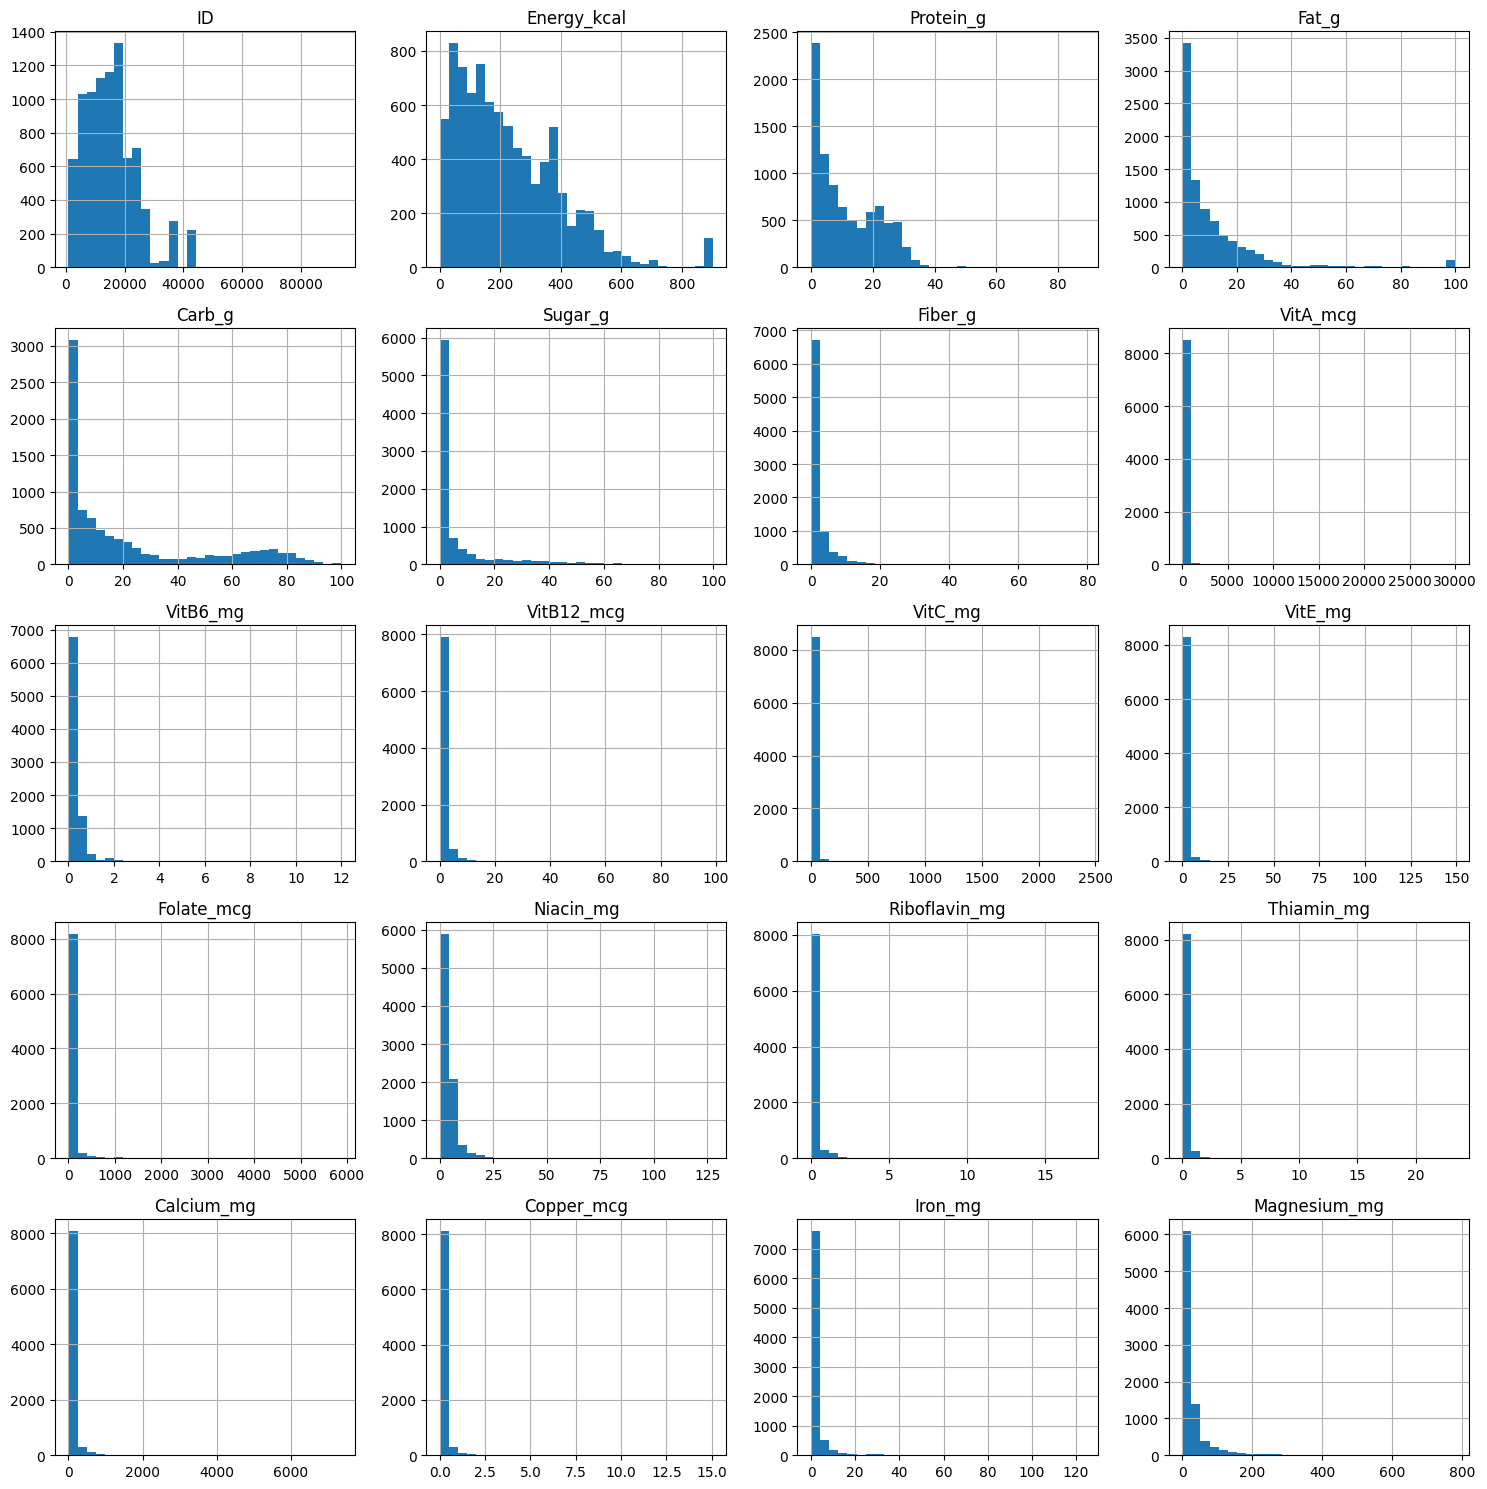

In [12]:
df_redux.iloc[:, :20].hist(bins=30, figsize=(15,15))
plt.tight_layout()
plt.show()

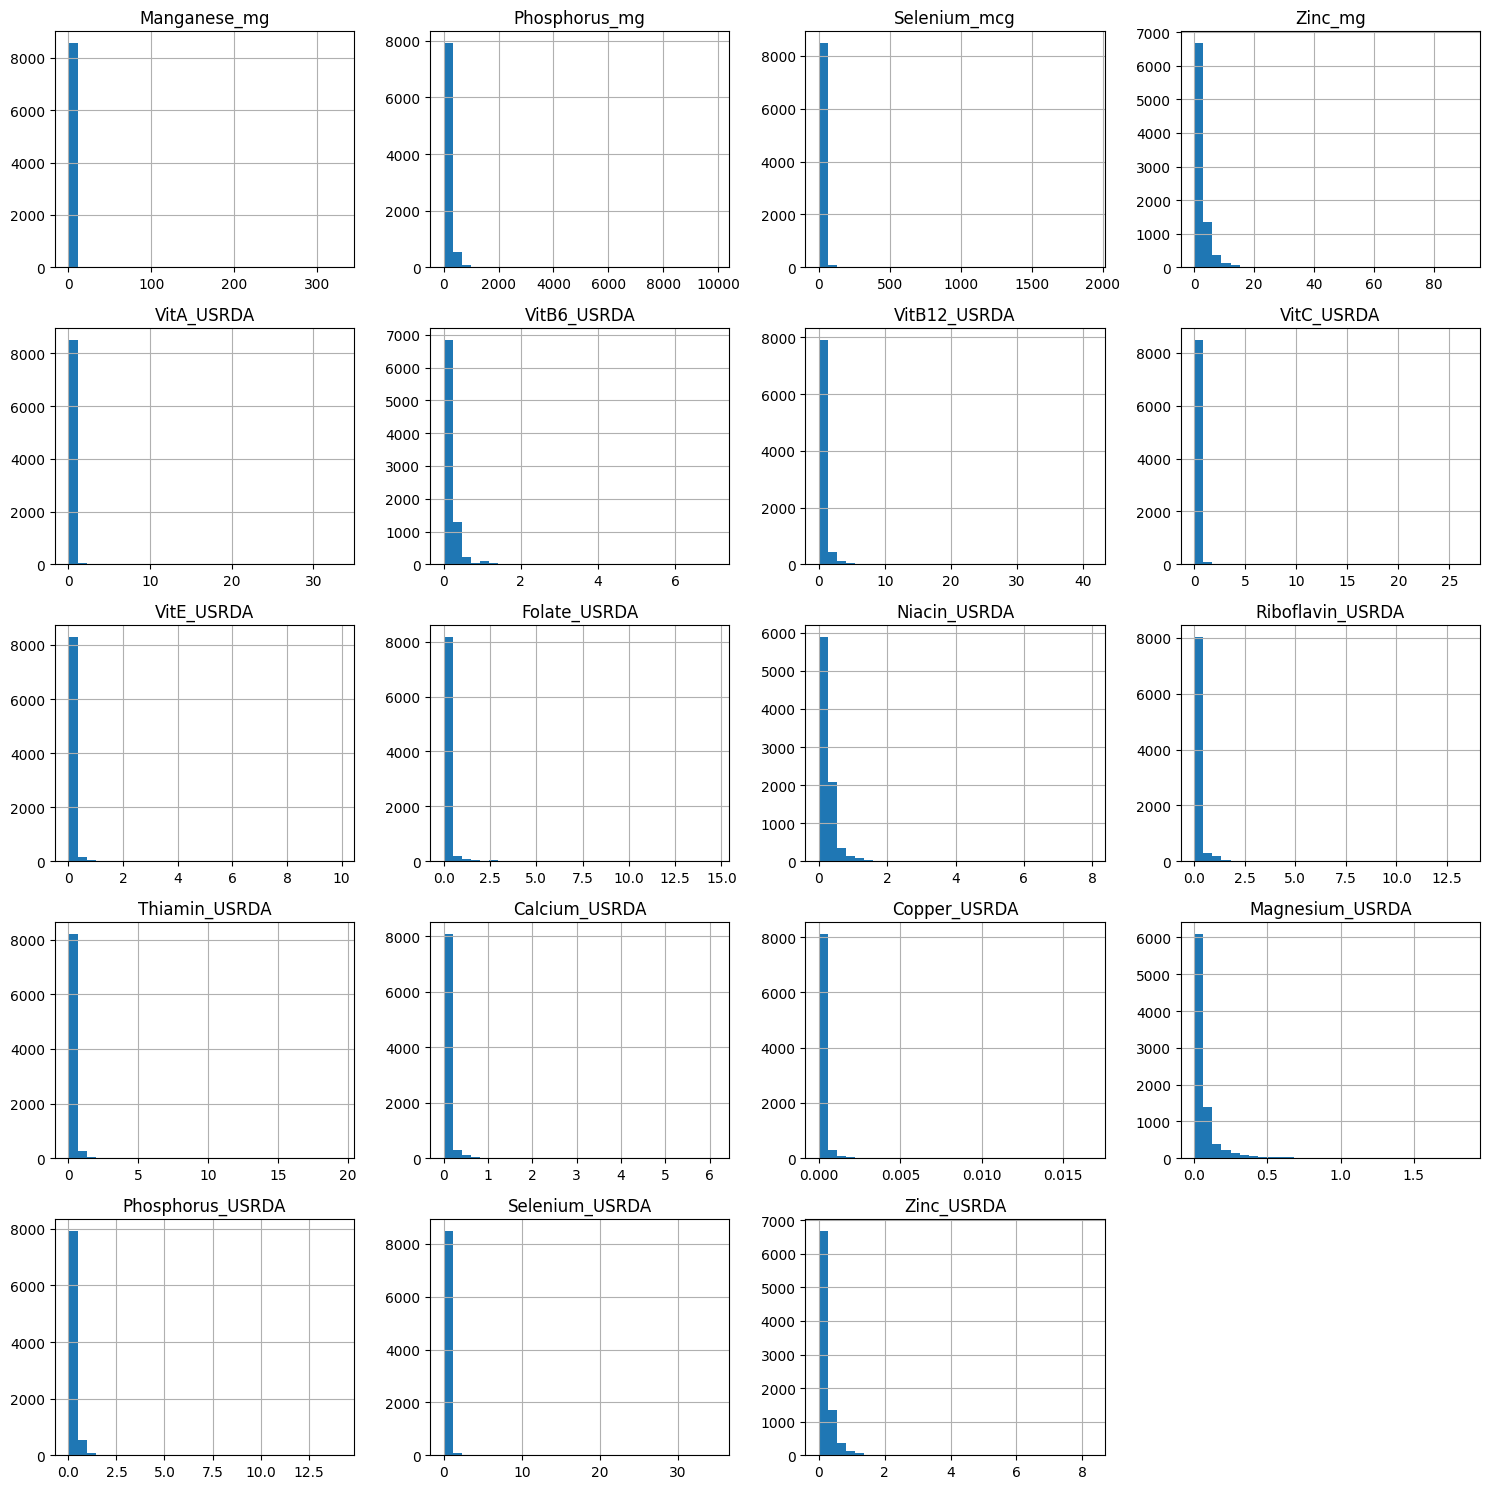

In [13]:
df_redux.iloc[:, 20:].hist(bins=30, figsize=(15,15))
plt.tight_layout()
plt.show()

In [14]:
df_redux.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [15]:
df_redux.shape

(8618, 39)

In [18]:
df_redux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   Energy_kcal       8618 non-null   float64
 2   Protein_g         8618 non-null   float64
 3   Fat_g             8618 non-null   float64
 4   Carb_g            8618 non-null   float64
 5   Sugar_g           8618 non-null   float64
 6   Fiber_g           8618 non-null   float64
 7   VitA_mcg          8618 non-null   float64
 8   VitB6_mg          8618 non-null   float64
 9   VitB12_mcg        8618 non-null   float64
 10  VitC_mg           8618 non-null   float64
 11  VitE_mg           8618 non-null   float64
 12  Folate_mcg        8618 non-null   float64
 13  Niacin_mg         8618 non-null   float64
 14  Riboflavin_mg     8618 non-null   float64
 15  Thiamin_mg        8618 non-null   float64
 16  Calcium_mg        8618 non-null   float64


In [19]:
cols_2_transf = df_redux.drop(columns='ID', axis=1).columns.values
len(cols_2_transf)

38

In [ ]:
(df[cols_2_transf] > 0).all() # todos tienen ceros

Energy_kcal         False
Protein_g           False
Fat_g               False
Carb_g              False
Sugar_g             False
Fiber_g             False
VitA_mcg            False
VitB6_mg            False
VitB12_mcg          False
VitC_mg             False
VitE_mg             False
Folate_mcg          False
Niacin_mg           False
Riboflavin_mg       False
Thiamin_mg          False
Calcium_mg          False
Copper_mcg          False
Iron_mg             False
Magnesium_mg        False
Manganese_mg        False
Phosphorus_mg       False
Selenium_mcg        False
Zinc_mg             False
VitA_USRDA          False
VitB6_USRDA         False
VitB12_USRDA        False
VitC_USRDA          False
VitE_USRDA          False
Folate_USRDA        False
Niacin_USRDA        False
Riboflavin_USRDA    False
Thiamin_USRDA       False
Calcium_USRDA       False
Copper_USRDA        False
Magnesium_USRDA     False
Phosphorus_USRDA    False
Selenium_USRDA      False
Zinc_USRDA          False
dtype: bool

In [21]:
for col in cols_2_transf:
    df_redux[f'log_{col}'] = np.log1p(df_redux[col])

In [22]:
df_redux.drop(columns=cols_2_transf, axis=1, inplace=True)
df_redux.shape

(8618, 39)

In [23]:
df_redux.head()

,ID,log_Energy_kcal,log_Protein_g,log_Fat_g,log_Carb_g,log_Sugar_g,log_Fiber_g,log_VitA_mcg,log_VitB6_mg,log_VitB12_mcg,...,log_Folate_USRDA,log_Niacin_USRDA,log_Riboflavin_USRDA,log_Thiamin_USRDA,log_Calcium_USRDA,log_Copper_USRDA,log_Magnesium_USRDA,log_Phosphorus_USRDA,log_Selenium_USRDA,log_Zinc_USRDA
0,1001,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,...,0.007472,0.002622,0.025818,0.004158,0.019803,0.000000,0.004751,0.033711,0.018019,0.008149
1,1002,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,...,0.007472,0.002622,0.025818,0.004158,0.019803,0.000018,0.004751,0.032329,0.018019,0.004535
2,1003,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,...,0.000000,0.000187,0.003839,0.000833,0.003328,0.000001,0.000000,0.004277,0.000000,0.000909
3,1004,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,...,0.086178,0.061565,0.257619,0.023879,0.364643,0.000044,0.053315,0.440097,0.233994,0.216577
4,1005,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,...,0.048790,0.007348,0.239017,0.011599,0.445754,0.000027,0.055570,0.497306,0.233994,0.212175


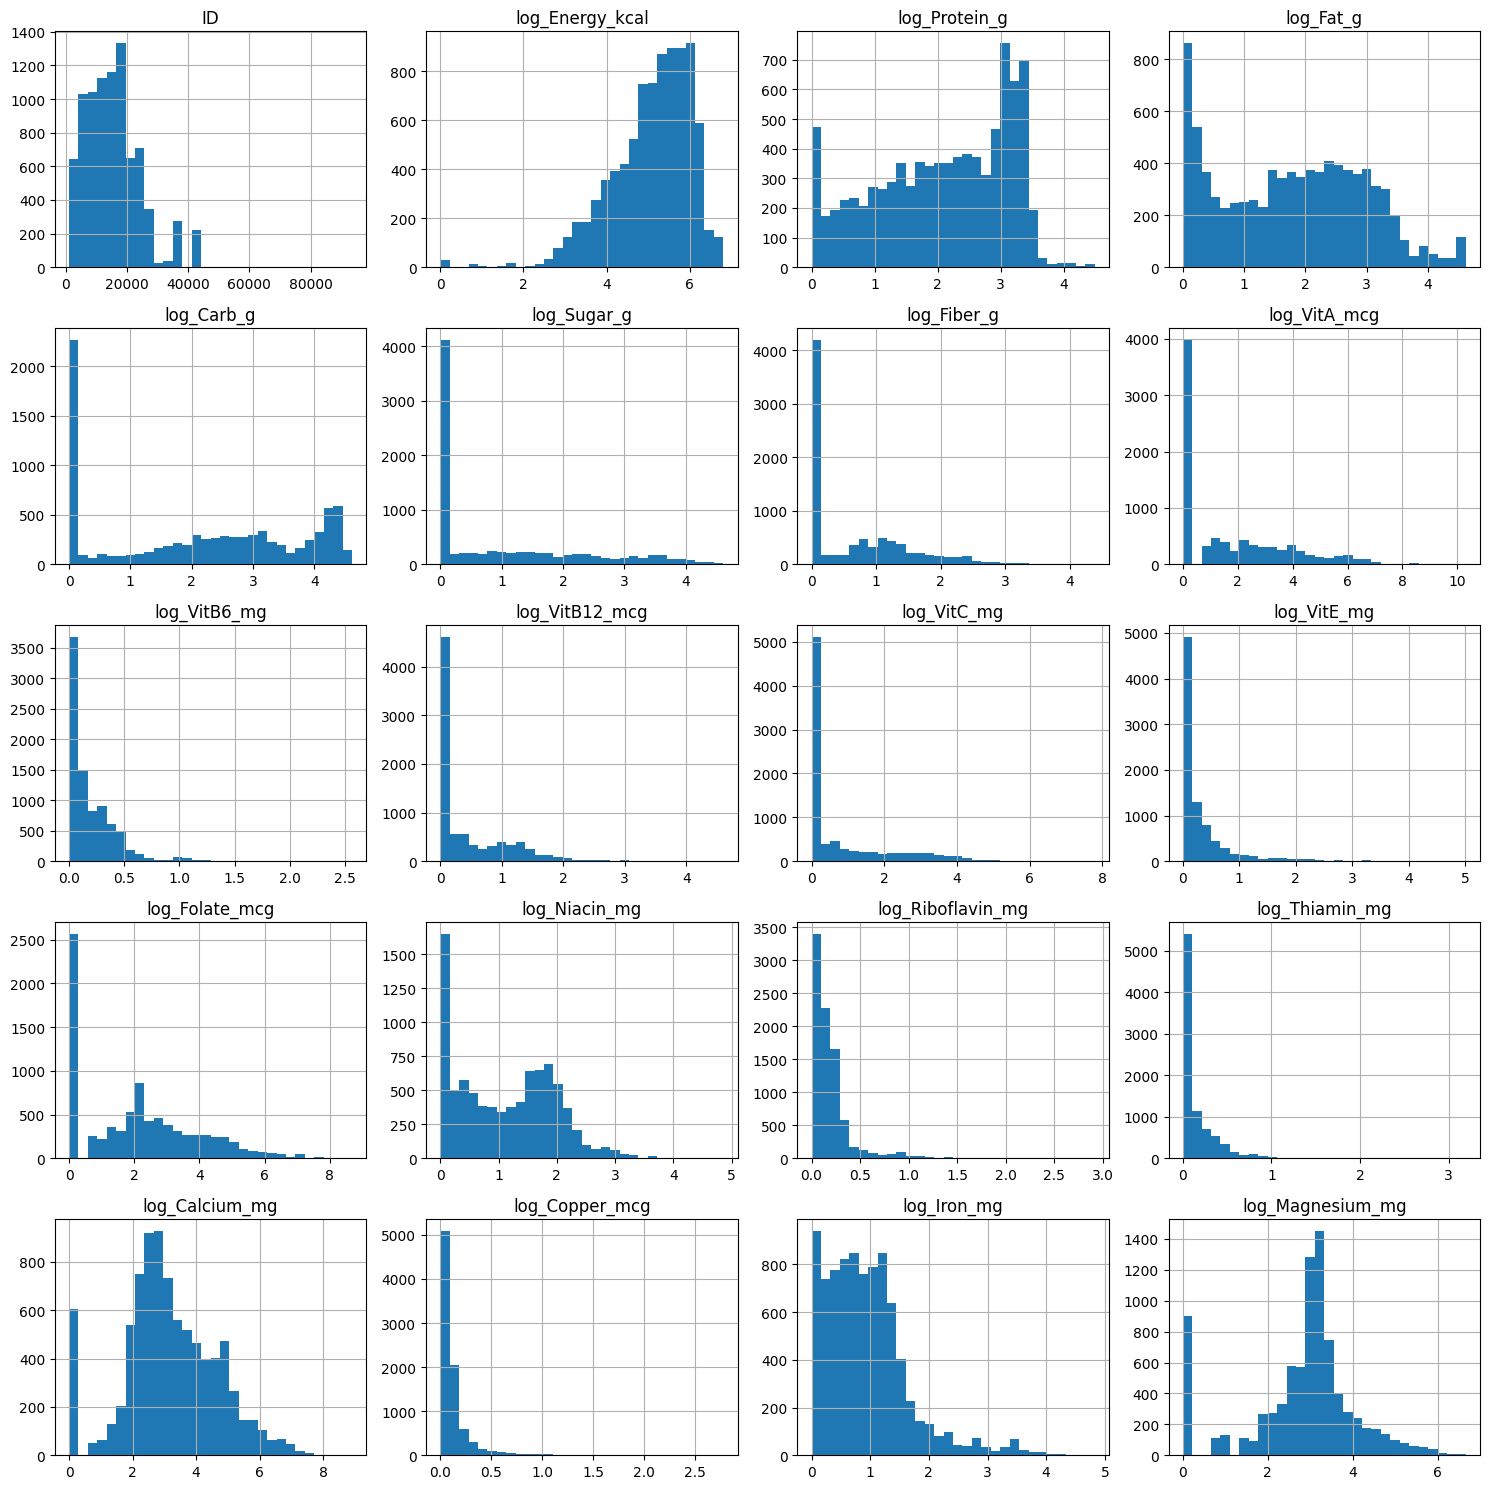

In [24]:
df_redux.iloc[:, :20].hist(bins=30, figsize=(15,15))
plt.tight_layout()
plt.show()

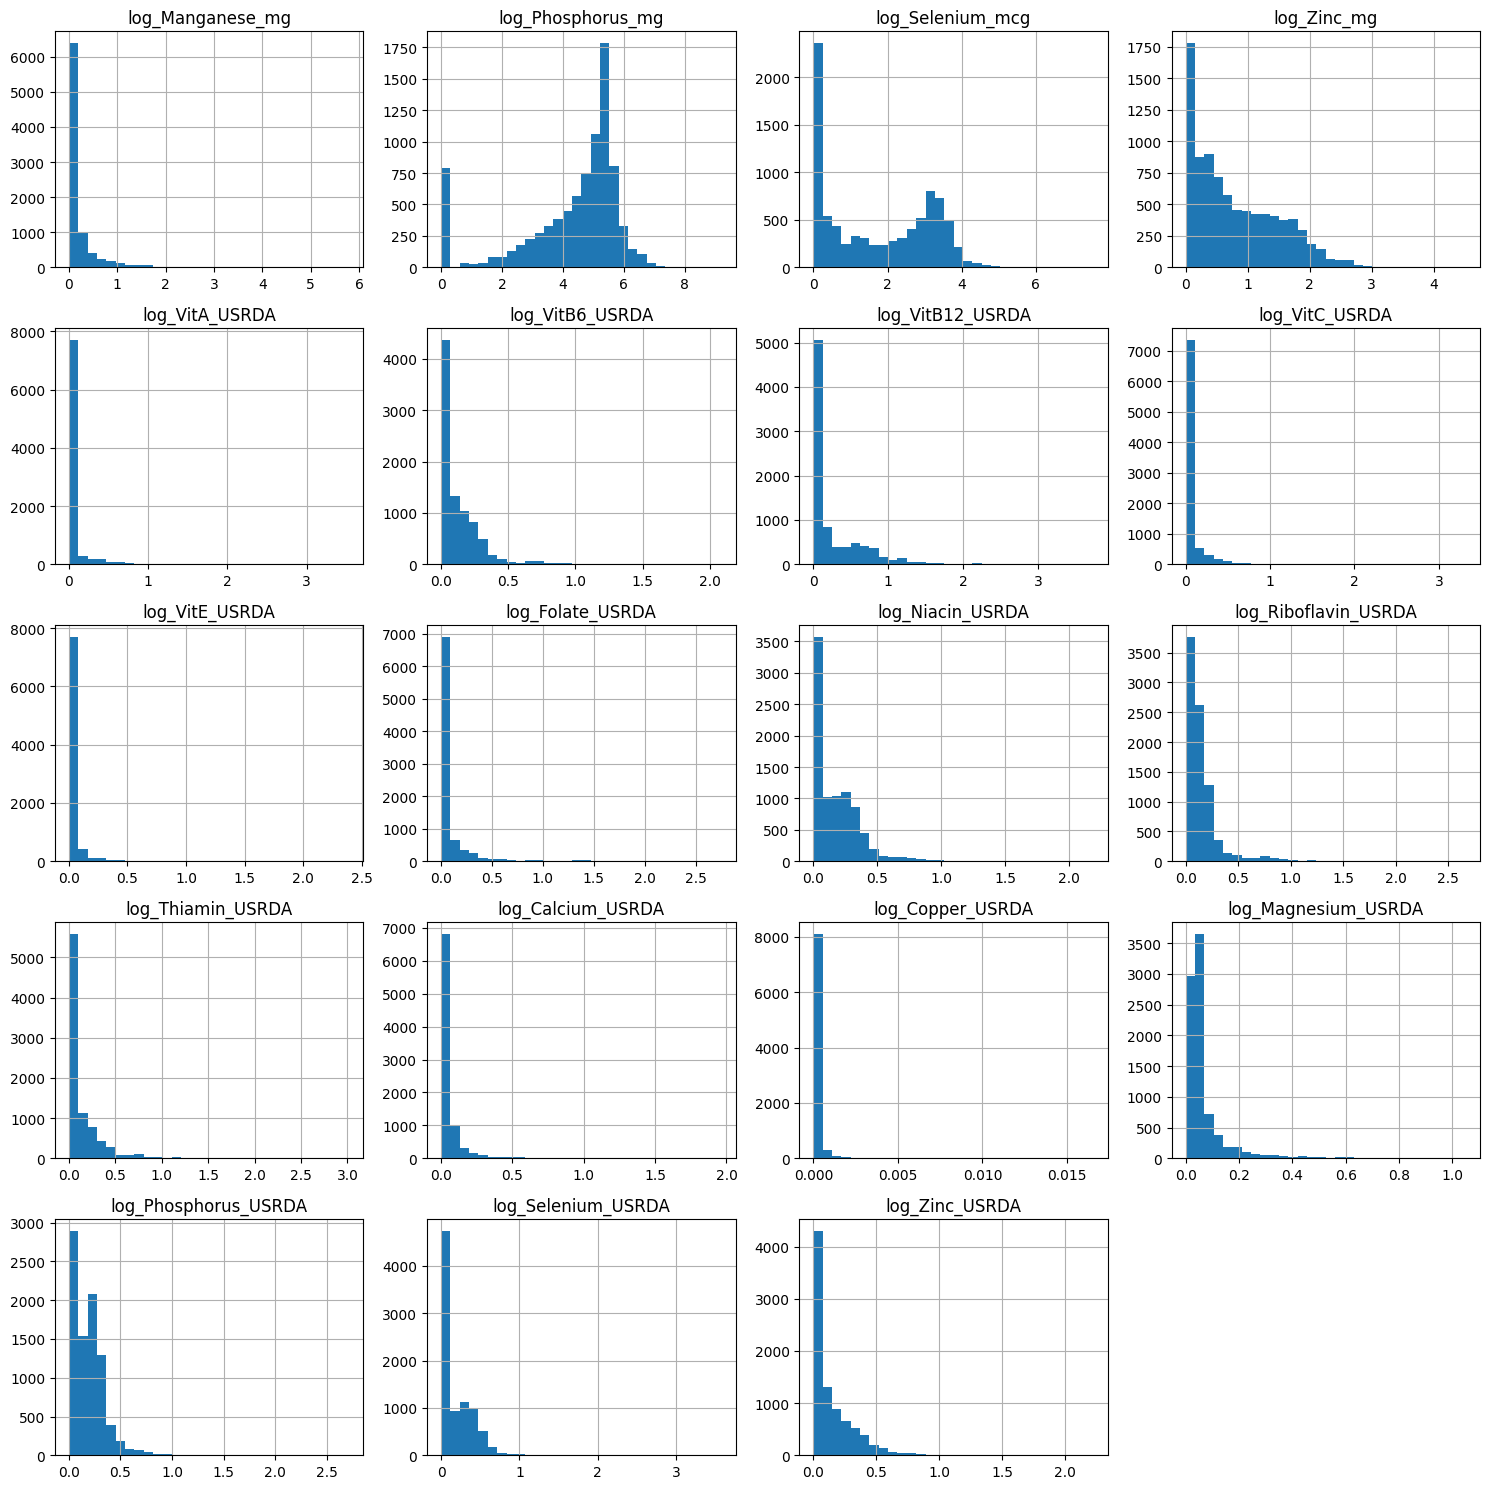

In [25]:
df_redux.iloc[:, 20:].hist(bins=30, figsize=(15,15))
plt.tight_layout()
plt.show()

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [28]:
ss = StandardScaler()
df_redux_ss = ss.fit_transform(df_redux)

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [55]:
pca = PCA(n_components=None)
pca.fit(df_redux_ss)


PCA()

In [56]:
pca.components_

array([[ 7.54278325e-03,  1.36557568e-01,  1.94439845e-01, ...,
         2.04634632e-01,  1.59704597e-01,  2.09612002e-01],
       [-3.50526887e-02, -1.36751855e-02, -2.28996584e-01, ...,
        -6.01560988e-02, -2.24011249e-01, -1.26065845e-01],
       [-1.28915911e-01, -2.25351053e-01, -1.54128387e-01, ...,
        -2.17118296e-01, -5.28312322e-02,  1.49333414e-02],
       ...,
       [ 3.37107990e-04, -7.65532141e-03,  4.96495917e-03, ...,
        -7.88302233e-03, -1.27442860e-02,  2.36386206e-02],
       [-9.77697019e-04, -1.80508719e-03,  6.76489130e-06, ...,
         2.82098666e-03,  1.85059581e-03, -2.48471029e-03],
       [ 3.63972929e-04, -4.30575556e-04,  2.90195005e-04, ...,
        -1.69027617e-04, -3.62776329e-03,  2.00021460e-03]],
      shape=(39, 39))

In [58]:
# pd.DataFrame(
#     data = pca.components_,
#     columns=df_redux.columns,
#     index=['PC1', 'PC2', 'PC3']
# )

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [59]:
# plt.figure(figsize=(12,12))
# sns.heatmap(pca.components_.T, cmap='seismic', annot=True, vmin=-1, vmax=1);

In [60]:
pca.explained_variance_ratio_

array([3.08066718e-01, 1.34312201e-01, 7.88371294e-02, 6.27966894e-02,
       5.43297433e-02, 4.25345849e-02, 4.08452012e-02, 3.01362927e-02,
       2.65128409e-02, 2.38757674e-02, 2.10511105e-02, 2.01945909e-02,
       1.77011403e-02, 1.49278312e-02, 1.39110608e-02, 1.31480672e-02,
       1.24040645e-02, 1.15263182e-02, 9.95651318e-03, 8.70300488e-03,
       7.55200899e-03, 6.87648172e-03, 6.42650318e-03, 5.73511532e-03,
       5.05052166e-03, 4.22831770e-03, 3.87705692e-03, 3.68885454e-03,
       2.38147308e-03, 1.92315781e-03, 1.75350806e-03, 1.70368277e-03,
       1.53316989e-03, 8.19701166e-04, 5.25858631e-04, 1.02734337e-04,
       3.62428485e-05, 1.02011757e-05, 4.54020382e-06])

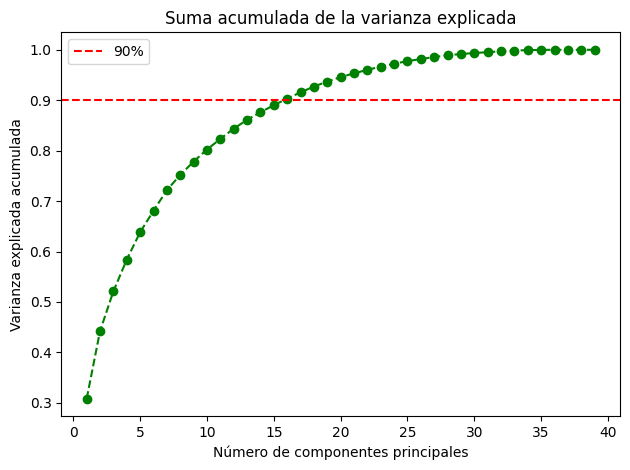

In [62]:
varianza_acc = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(varianza_acc) + 1),varianza_acc, marker='o', linestyle='--', color='g')
plt.title('Suma acumulada de la varianza explicada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(False)
plt.axhline(y=0.90, color='r', linestyle='--', label='90%')
plt.legend()
plt.tight_layout()

plt.show()

In [63]:
# Encontrar el primer índice que supere el 70% y el primero que supere el 75%
n_70 = np.argmax(varianza_acc >= 0.70) + 1
n_75 = np.argmax(varianza_acc >= 0.75) + 1

print(f'📊 Número de componentes para explicar al menos 70%: {n_70}')
print(f'📊 Número de componentes para explicar al menos 75%: {n_75}')


📊 Número de componentes para explicar al menos 70%: 7
📊 Número de componentes para explicar al menos 75%: 8


## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [75]:
pca_7 = PCA(n_components=7)
proyecciones = pca_7.fit_transform(df_redux)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7'],
    index   = df.ID
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
ID,,,,,,,
1001,-14466.757508,-0.636948,-0.021212,4.422679,-3.735968,-1.149165,2.107989
1002,-14465.757508,-0.648388,-0.001864,4.411624,-3.737923,-1.164364,2.114677
1003,-14464.757516,-3.190944,-0.203791,5.158699,-4.549390,-2.201887,1.687074
1004,-14463.757423,4.368264,-0.161594,2.022143,-2.001143,0.951451,2.368224
1005,-14462.757420,4.339977,-0.042038,2.315995,-2.485604,1.463824,2.338854


In [72]:
proyecciones.shape

(8618, 7)

### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [76]:
for pc in proyecciones.columns:
    print(f'First 3 FoodGroups para {pc} (valores más altos):')

    # Combinar con FoodGroup
    combinados = pd.concat([proyecciones[pc], df[['FoodGroup']]], axis=1)

    # Ordenar por valores más altos de esa componente
    top = combinados.sort_values(by=pc, ascending=False)

    # Obtener los 3 grupos de alimentos más frecuentes en el top 50 (puedes ajustar ese número)
    top_3_grupos = top['FoodGroup'].head(50).value_counts().head(3)

    print(top_3_grupos)


First 3 FoodGroups para PC1 (valores más altos):
Series([], Name: count, dtype: int64)
First 3 FoodGroups para PC2 (valores más altos):
FoodGroup
Baked Products                         7
American Indian/Alaska Native Foods    6
Breakfast Cereals                      5
Name: count, dtype: int64
First 3 FoodGroups para PC3 (valores más altos):
FoodGroup
Baked Products                         7
American Indian/Alaska Native Foods    5
Restaurant Foods                       3
Name: count, dtype: int64
First 3 FoodGroups para PC4 (valores más altos):
FoodGroup
Lamb, Veal, and Game Products      10
Finfish and Shellfish Products      6
Meals, Entrees, and Side Dishes     2
Name: count, dtype: int64
First 3 FoodGroups para PC5 (valores más altos):
Series([], Name: count, dtype: int64)
First 3 FoodGroups para PC6 (valores más altos):
FoodGroup
Soups, Sauces, and Gravies    7
Breakfast Cereals             6
Baby Foods                    2
Name: count, dtype: int64
First 3 FoodGroups para PC7 (v